In [58]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [59]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [60]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [61]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
scaled_market_data = scaler.fit_transform(market_data_df)

print(scaled_market_data)

[[ 5.08529366e-01  4.93193071e-01  7.72200433e-01  2.35459633e-01
  -6.74950963e-02 -3.55953481e-01 -2.51636882e-01]
 [ 1.85445894e-01  9.34445040e-01  5.58692121e-01 -5.43409317e-02
  -2.73482725e-01 -1.15759474e-01 -1.99352110e-01]
 [ 2.17739616e-02 -7.06336853e-01 -2.16804207e-02 -6.10301536e-02
   8.00452481e-03 -5.50246924e-01 -2.82060506e-01]
 [-4.07643829e-02 -8.10928066e-01  2.49457974e-01 -5.03879651e-02
  -3.73164019e-01 -4.58258816e-01 -2.95546142e-01]
 [ 1.19303608e+00  2.00095907e+00  1.76061001e+00  5.45842065e-01
  -2.91202870e-01 -4.99847761e-01 -2.70316950e-01]
 [ 8.91870708e-01  1.32729453e+00  8.00214184e-01 -5.71478992e-02
   7.78653106e-01 -1.88231917e-01 -2.25532605e-01]
 [ 1.13972400e-02  2.57225091e+00  1.10164693e+00 -4.90495415e-01
  -9.31954023e-01  3.87758986e-01 -1.82843995e-02]
 [ 1.02529802e-01  1.50800146e+00  6.48885061e-01  3.28959245e-01
  -4.86348899e-01  6.50796233e-02 -1.55428416e-01]
 [ 7.74971820e-02  3.34296562e-01  8.58519864e-01 -1.26464730e-0

In [62]:
# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_market_data, columns=market_data_df.columns)

# Copy the crypto names from the original data
scaled_df['coin_id'] = market_data_df.index


# Set the coinid column as index
scaled_df = scaled_df.set_index('coin_id')


# Display sample data
scaled_df.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [63]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1,11))


# Create an empty list to store the inertia values
inertia = []


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list

for i in k_values:
    model = KMeans(n_clusters=i, random_state=0)
    model.fit(scaled_df)
    inertia.append(model.inertia_)


# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": k_values,
    "inertia": inertia
}


# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)


# Display the DataFrame
print(elbow_df)


    k     inertia
0   1  287.000000
1   2  198.571818
2   3  145.635748
3   4   79.022435
4   5   66.217780
5   6   59.139070
6   7   48.406314
7   8   38.993588
8   9   34.400595
9  10   28.573603


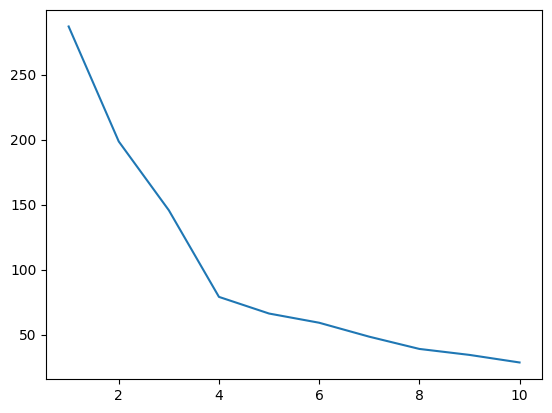

In [64]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.plot(elbow_df['k'], elbow_df['inertia'])



#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** 4

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [65]:
# Initialize the K-Means model using the best value for k
k4 = KMeans(n_clusters=4, random_state=1)

In [66]:
# Fit the K-Means model using the scaled data
k4.fit_transform(scaled_df)

array([[ 1.79023796,  8.39640372,  0.77905911, 10.07638223],
       [ 1.8586413 ,  8.73943752,  0.46898631,  9.71065968],
       [ 0.64617587,  8.82871821,  2.14580249,  9.77967482],
       [ 0.90197755,  8.92330413,  2.13888295,  9.76283264],
       [ 3.71207556,  8.53459271,  1.62465144, 11.00425413],
       [ 2.60011258,  8.18808863,  1.22179747, 10.26540915],
       [ 3.67770574,  9.52051562,  1.84951124,  9.69003261],
       [ 2.48484272,  8.66805419,  0.57704925,  9.70607275],
       [ 1.69140592,  8.78087463,  0.94966721,  9.92606322],
       [ 0.88803887,  9.09062711,  1.82819562,  9.93274475],
       [ 1.36248852,  9.610849  ,  3.51951472,  9.50071135],
       [ 0.64937833,  8.8338889 ,  2.16890397,  9.78754129],
       [ 0.96455753,  9.23545589,  2.33440626,  9.87541181],
       [ 4.08143325,  7.10505427,  2.24037008, 10.59748833],
       [ 0.90272985,  8.89714367,  1.62880277,  9.59872794],
       [ 1.78176339,  9.67942998,  1.3970836 ,  9.61201175],
       [ 1.34282761,  9.

In [67]:
# Predict the clusters to group the cryptocurrencies using the scaled data
predicted_clusters = k4.predict(scaled_df)

# View the resulting array of cluster values.
print(predicted_clusters)


[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [68]:
# Create a copy of the DataFrame
k4_cluster_df = scaled_df.copy()


In [69]:
# Add a new column to the DataFrame with the predicted clusters
k4_cluster_df['cluster'] = predicted_clusters


# Display sample data
k4_cluster_df


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,2
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,2
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,2
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,2


<Axes: title={'center': 'Cryptocurrency Clusters'}, xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

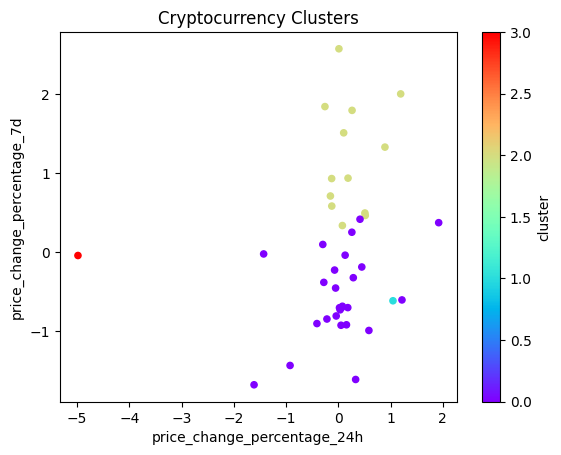

In [70]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.

k4_cluster_df.plot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    c='cluster',
    colormap='rainbow',
    title='Cryptocurrency Clusters'
    )


### Optimize Clusters with Principal Component Analysis.

In [71]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)


In [72]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
scaled_df_pca = pca.fit_transform(scaled_df)

# View the first five rows of the DataFrame. 
scaled_df_pca[:5]


array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [73]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_

print(f'Explained Variance: {explained_variance}')

Explained Variance: [0.3719856  0.34700813 0.17603793]


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.3719856, 0.34700813, 0.17603793

In [74]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you
# Creating a DataFrame with the PCA data
# Copy the crypto names from the original data
# Set the coinid column as index
# Display sample data

new_pca_df = pd.DataFrame(
    scaled_df_pca,
    columns=['PC1', 'PC2', 'PC3'],
    index=scaled_df.index
)

new_pca_df

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


### Find the Best Value for k Using the PCA Data

In [75]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1,11))

# Create an empty list to store the inertia values
intertia2 = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list

for i in k:
    model = KMeans(n_clusters=i, random_state=0)
    model.fit(new_pca_df)
    intertia2.append(model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data2 = {
    'k': k,
    'intertia': intertia2
}


# Create a DataFrame with the data to plot the Elbow curve
elbow_df2 = pd.DataFrame(elbow_data2)

# Display the DataFrame
elbow_data2


{'k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'intertia': [256.8740855678925,
  168.81189630685222,
  115.91807663320066,
  49.665496651797376,
  41.35731380312856,
  30.796641787041583,
  25.91545691045613,
  21.890936274633233,
  17.720698854473675,
  13.838698708864568]}

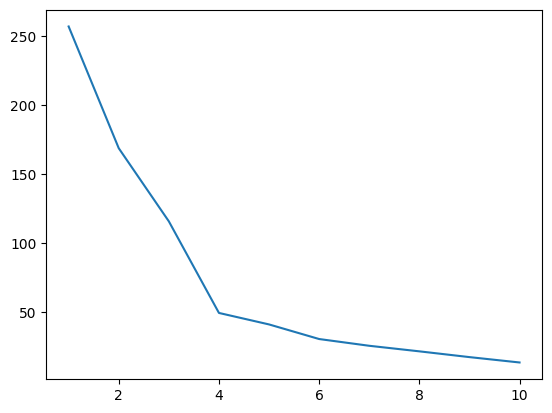

In [76]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.plot(elbow_df2['k'], elbow_df2['intertia'])


#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** It does not.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [77]:
# Initialize the K-Means model using the best value for k
new_k4 = KMeans(n_clusters=4, random_state=1)


In [78]:
# Fit the K-Means model using the PCA data
new_k4.fit(new_pca_df)


KMeans(n_clusters=4, random_state=1)

In [79]:
# Predict the clusters to group the cryptocurrencies using the PCA data
k4_predictions = new_k4.predict(new_pca_df)

# Print the resulting array of cluster values.
print(k4_predictions)


[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [80]:
# Create a copy of the DataFrame with the PCA data
new_k4_cluster_df = new_pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
new_k4_cluster_df['cluster'] = k4_predictions

# Display sample data
new_k4_cluster_df


,PC1,PC2,PC3,cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2
binancecoin,-0.516534,1.388377,0.804071,2
chainlink,-0.450711,0.517699,2.846143,2
cardano,-0.345600,0.729439,1.478013,2
litecoin,-0.649468,0.432165,0.600303,2


In [81]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 



### Determine the Weights of Each Feature on each Principal Component

In [82]:
# Use the columns from the original scaled DataFrame as the index.


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
    